**"" Program Name : Frame Matching Rate Calculate**  
**"" Programmer : Jeong Seonil**  
**"" Virsion No. : 21.03.31**  
**"" Revision Date : 21.03.31**  
**"" Function :**

     해당 프로그램은 Sig De&Ext 코드를 거쳐 생성된 동작 프레임의 파일을 읽어와서 각각의 프레임의 매칭 레이트를 계산하는 프로그램이다.


In [1]:
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import threading
import glob
import sys
from scipy import signal
import pylab as pl
from enum import Enum
from IPython import display
from IPython.display import clear_output
import os 

def all_subdirs_of(b='.'):
    result = []
    for d in os.listdir(b):
        bd = os.path.join(b, d)
        if os.path.isdir(bd): result.append(bd)
    return result

In [7]:
def Init():
    root_path = '../../../Data/Motion Frame Data'
    date_list = []
    motion_list = []
    human_list = []
    motion_number = 0
    human_number = 0

    #files = os.listdir(root_path)
    #for i in files :
    #    if os.path.isdir(root_path + "/"+i):
    #        date_list.append(i)
    date_list = os.listdir(root_path)

    number = int(input("리스트에서 실험하고 싶은 데이터의 날짜를 선택하세요.(번호 1~{}사이)\n {} >> ".format(len(date_list),date_list)))
    global date_path
    date_path = root_path + "/"+ date_list[number-1]
    print('')

    name_flag = input('실험동작과 실험자를 입력하시겠습니까? 입력하지 않으면 전부 선택합니다. \n 입력하시는 경우는 Y를 입력하세요(Y/N) >> ')
    print('')

    if name_flag == 'Y':
        temp = os.listdir(date_path)
        print(temp)
        motion_number = int(input("실험 동작의 갯수를 입력하세요 >> "))
        print('')
        for i in range(motion_number):
            motion = int(input('위의 리스트에서 동작의 번호를 입력하세요. (번호 1~{}사이) >> '.format(len(temp))))
            print('')
            motion_list.append(temp[motion-1])
            print('선택된 동작 {}'.format(motion_list))
        temp = os.listdir(date_path + "/"+ motion_list[0])
        print(temp)
        human_number = int(input("실험자의 수를 입력하세요 >> "))
        print('')
        for i in range(human_number):
            human = int(input('위의 리스트에서 실험자의 번호를 입력하세요. (번호 1~{}사이) >> '.format(len(temp))))
            print('')
            human_list.append(temp[human-1])
            print('선택된 실험자 {}'.format(human_list))
    elif name_flag == 'N':
        motion_list = os.listdir(date_path)
        human_list = os.listdir(date_path + "/"+ motion_list[0])
        
    var_flag = input('실험 파라미터를 입력하시겠습니까? 입력하지 않으면 초기값으로 결정됩니다. \n 입력하시는 경우는 Y를 입력하세요(Y/N) >> ')
    print('')
    if var_flag == 'Y':
        global Initial_threshold
        Initial_threshold = float(input("초기 문턱치를 입력하세요 : "))
        print('')

    return motion_list,human_list

In [8]:
def Data_load(date_path,motion,human):

    human_path = date_path + '/' + motion + '/' + human
    A_5sec = glob.glob(human_path + '/' + 'Frame/A_temp/*.csv')
    B_5sec = glob.glob(human_path + '/' + 'Frame/B_temp/*.csv')

    return A_5sec,B_5sec

리스트에서 실험하고 싶은 데이터의 날짜를 선택하세요.(번호 1~2사이)
 ['2021.04.01 200429', '2021.04.09 163032'] >> 2

실험동작과 실험자를 입력하시겠습니까? 입력하지 않으면 전부 선택합니다. 
 입력하시는 경우는 Y를 입력하세요(Y/N) >> Y

['Mo type 1. LR', 'Mo type 2. RL', 'Mo type 3. CW']
실험 동작의 갯수를 입력하세요 >> 1

위의 리스트에서 동작의 번호를 입력하세요. (번호 1~3사이) >> 1

선택된 동작 ['Mo type 1. LR']
['CJW', 'JSI', 'KB', 'KJY', 'KME', 'PJS']
실험자의 수를 입력하세요 >> 1

위의 리스트에서 실험자의 번호를 입력하세요. (번호 1~6사이) >> 2

선택된 실험자 ['JSI']
실험 파라미터를 입력하시겠습니까? 입력하지 않으면 초기값으로 결정됩니다. 
 입력하시는 경우는 Y를 입력하세요(Y/N) >> Y

초기 문턱치를 입력하세요 : 0.022

Matching Rate : 95.17%
0번째


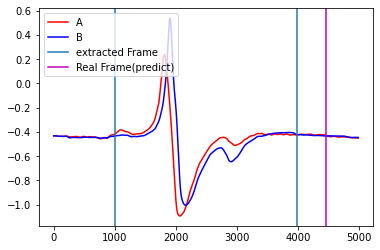

Matching Rate : 95.23%
1번째


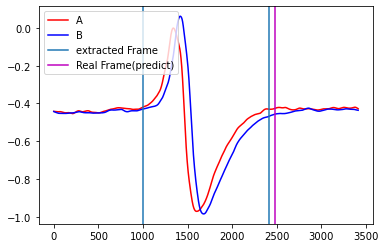

Matching Rate : 98.69%
2번째


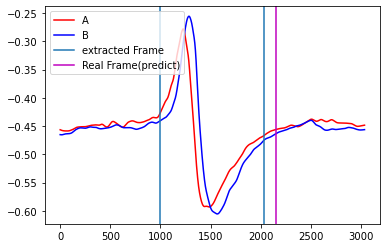

Matching Rate : 81.38%
3번째


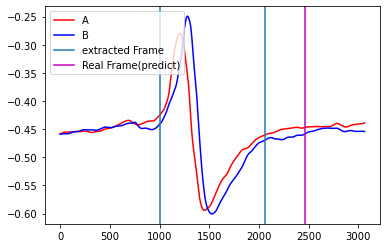

Matching Rate : 97.15%
4번째


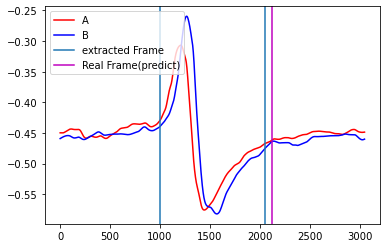

Matching Rate : 99.41%
5번째


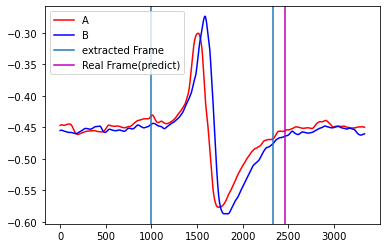

Matching Rate : 99.35%
6번째


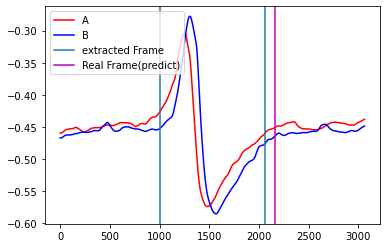

Matching Rate : 94.9%
7번째


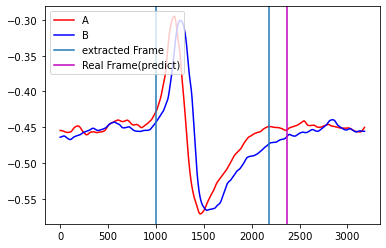

Matching Rate : 99.26%
8번째


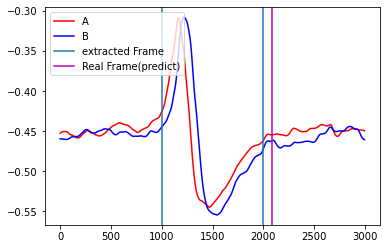

Matching Rate : 96.35%
9번째


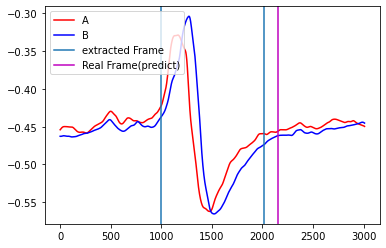

Matching Rate : 86.7%
10번째


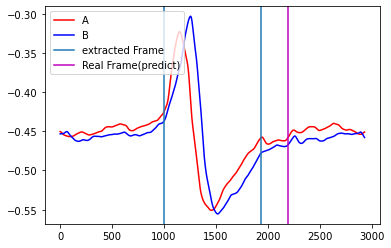

Matching Rate : 97.23%
11번째


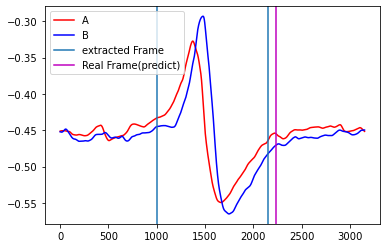

Matching Rate : 96.76%
12번째


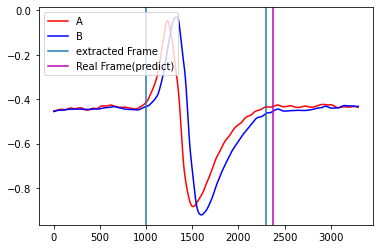

Matching Rate : 99.21%
13번째


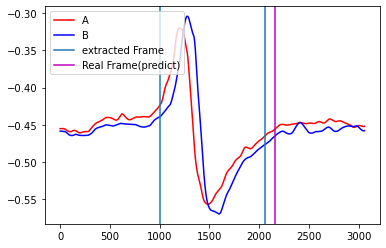

Matching Rate : 99.59%
14번째


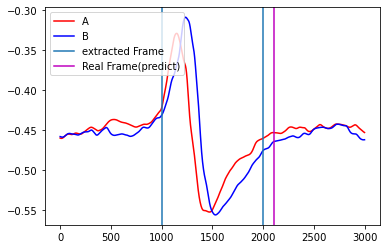

Matching Rate : 99.12%
15번째


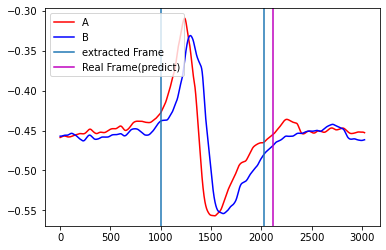

Matching Rate : 99.02%
16번째


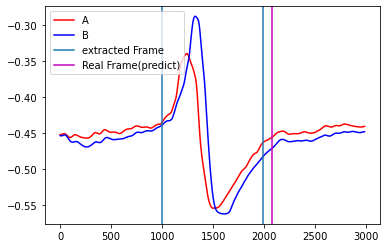

Matching Rate : 92.96%
17번째


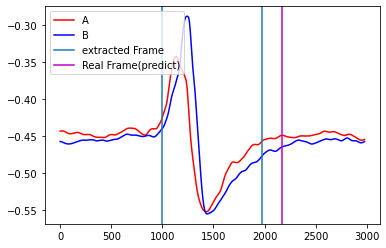

Matching Rate : 99.32%
18번째


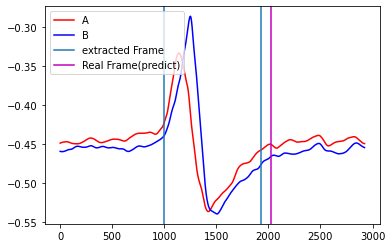

Matching Rate : 94.49%
19번째


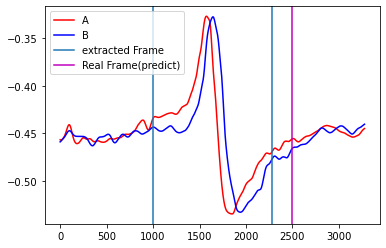

Matching Rate : 98.17%
20번째


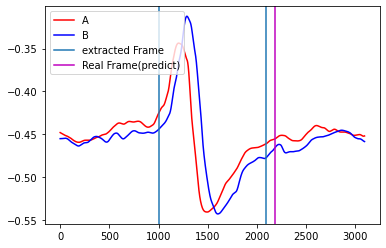

Matching Rate : 88.61%
21번째


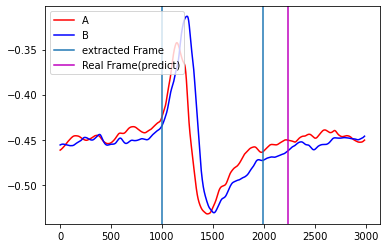

Matching Rate : 97.13%
22번째


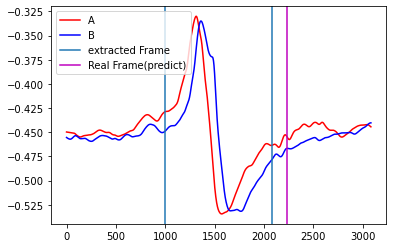

Matching Rate : 95.29%
23번째


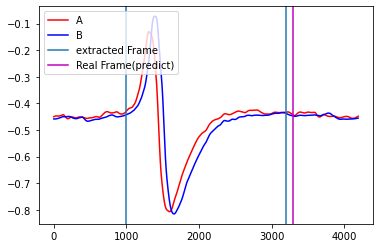

Matching Rate : 99.48%
24번째


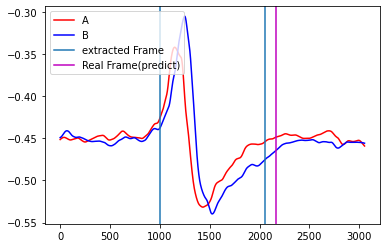

Matching Rate : 95.72%
25번째


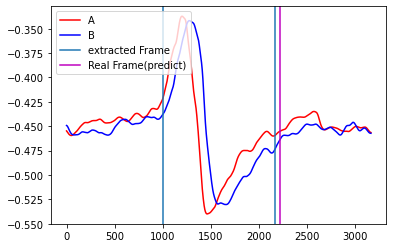

Matching Rate : 94.56%
26번째


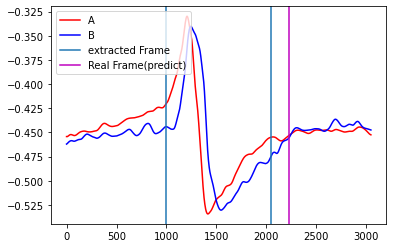

Matching Rate : 94.74%
27번째


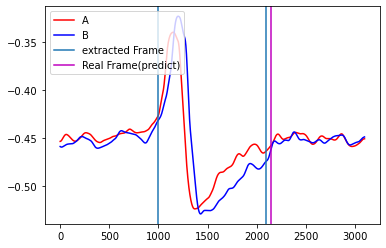

Matching Rate : 99.28%
28번째


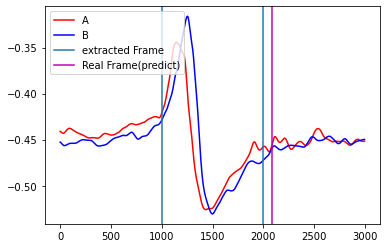

Matching Rate : 95.28%
29번째


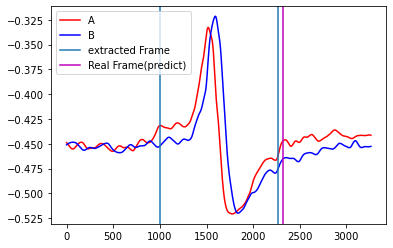

Matching Rate : 96.14%
30번째


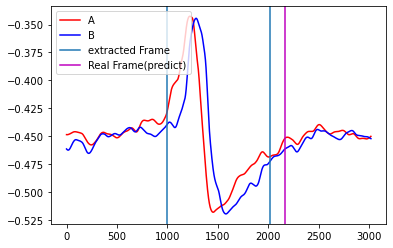

Matching Rate : 98.58%
31번째


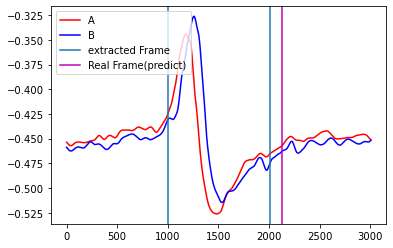

Matching Rate : 96.21%
32번째


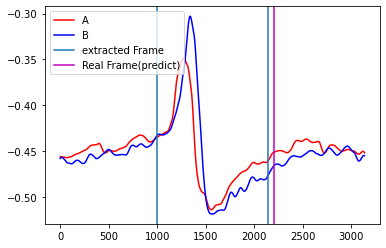

Matching Rate : 98.56%
33번째


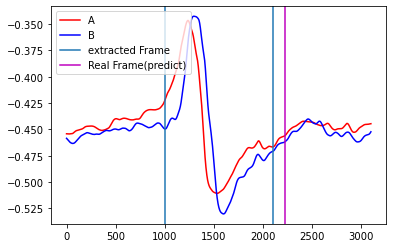

Matching Rate : 99.56%
34번째


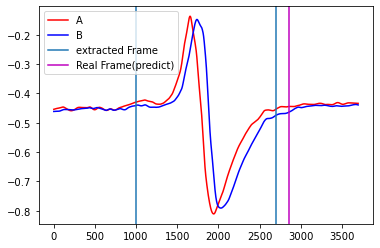

Matching Rate : 85.92%
35번째


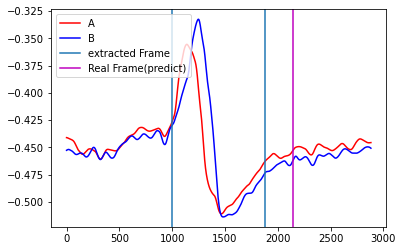

Matching Rate : 82.82%
36번째


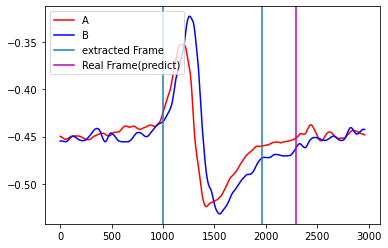

Matching Rate : 89.07%
37번째


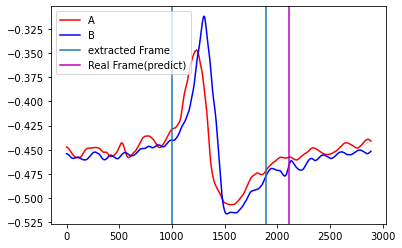

Matching Rate : 86.75%
38번째


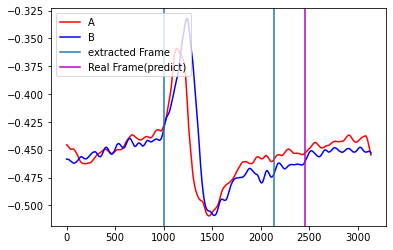

Matching Rate : 90.82%
39번째


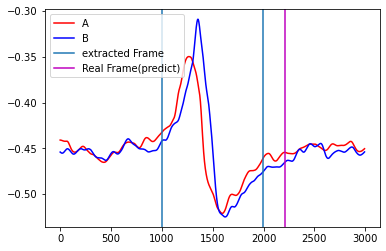

Matching Rate : 91.24%
40번째


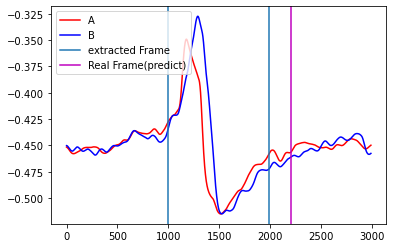

Matching Rate : 92.71%
41번째


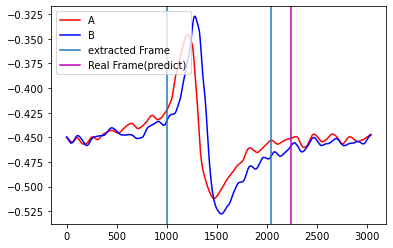

Matching Rate : 83.99%
42번째


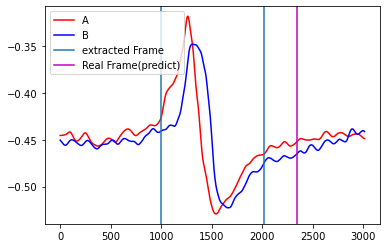

Matching Rate : 93.03%
43번째


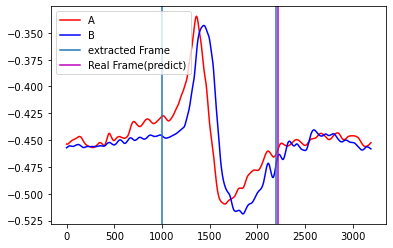

Matching Rate : 98.32%
44번째


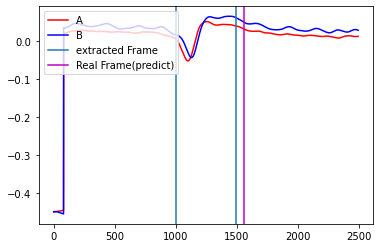

Matching Rate : 99.5%
45번째


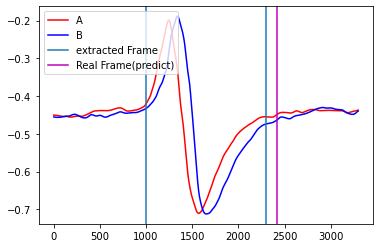

Matching Rate : 92.24%
46번째


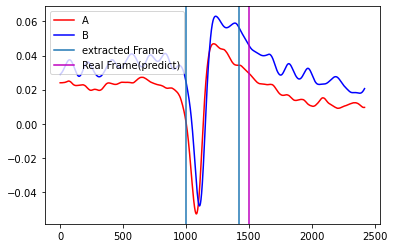

Matching Rate : 92.27%
47번째


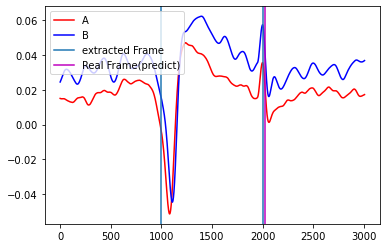

Matching Rate : 60.49%
48번째


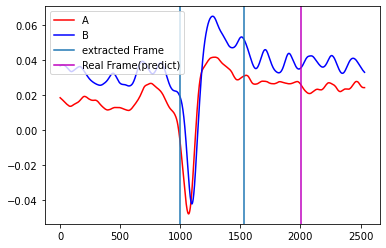

Matching Rate : 97.83%
49번째


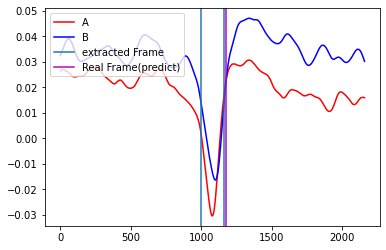

Matching Rate : 99.59%
50번째


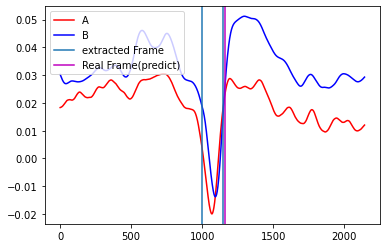

Matching Rate : 98.62%
51번째


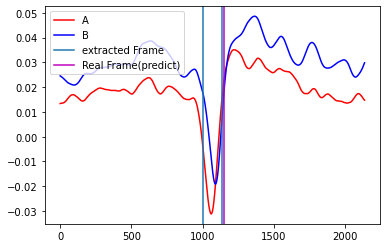

Matching Rate : 92.31%
52번째


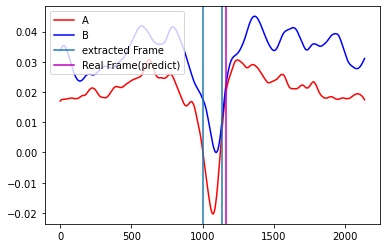

Matching Rate : 96.96%
53번째


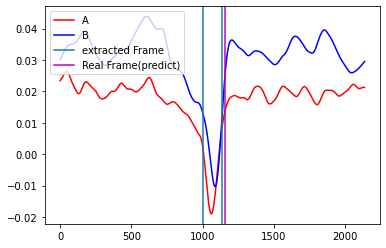

Matching Rate : 77.86%
54번째


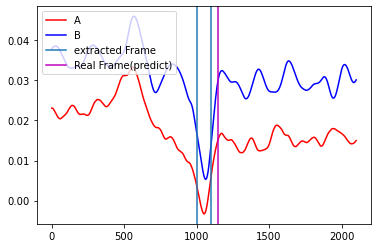

Matching Rate : 32.71%
55번째


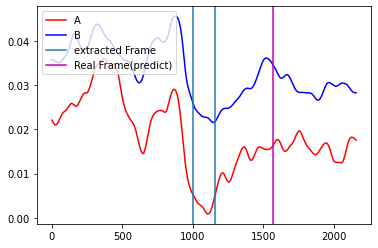

Matching Rate : 98.21%
56번째


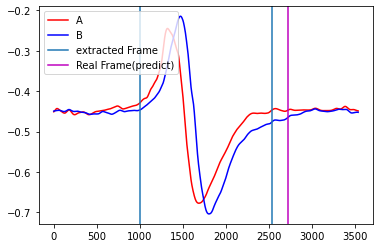

Matching Rate : 8.92%
57번째


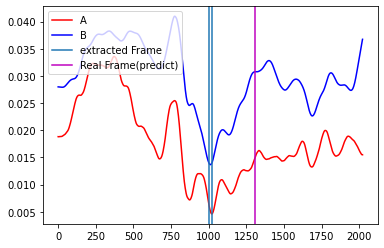

Matching Rate : 45.35%
58번째


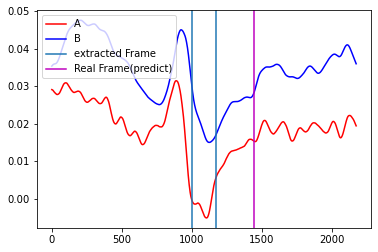

Matching Rate : 45.13%
59번째


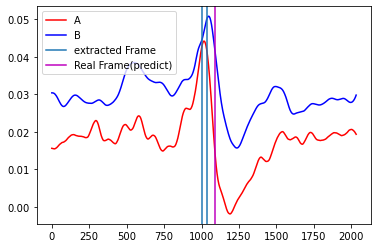

Matching Rate : 77.97%
60번째


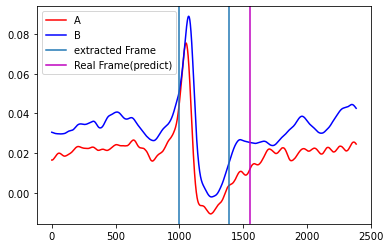

Matching Rate : 73.87%
61번째


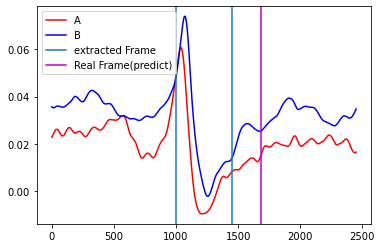

Matching Rate : 38.91%
62번째


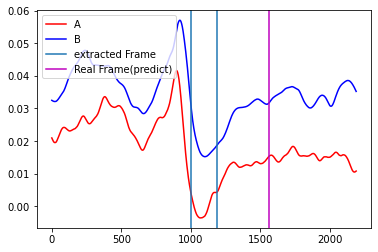

Matching Rate : 96.83%
63번째


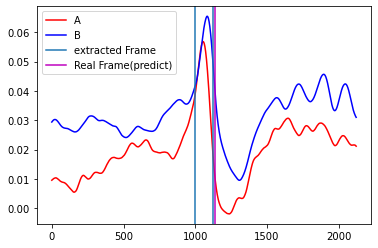

Matching Rate : 25.13%
64번째


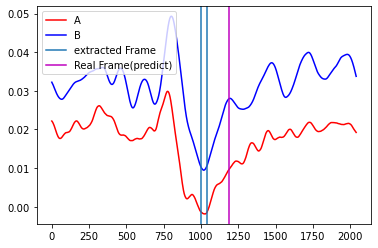

Matching Rate : 86.88%
65번째


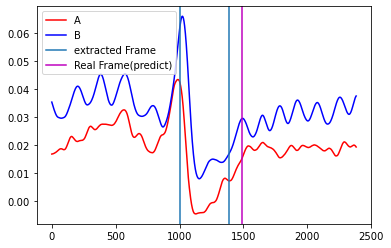

Matching Rate : 93.99%
66번째


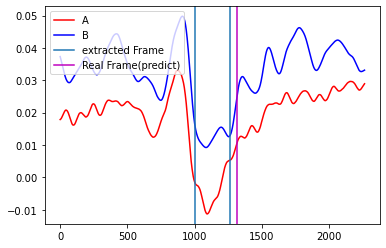

Matching Rate : 84.3%
67번째


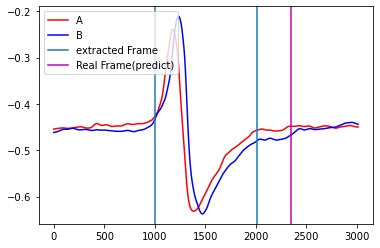

Matching Rate : 61.86%
68번째


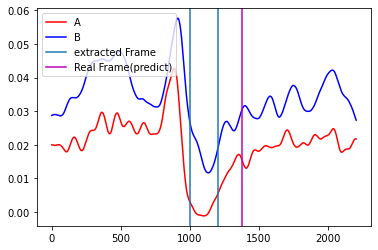

Matching Rate : 42.64%
69번째


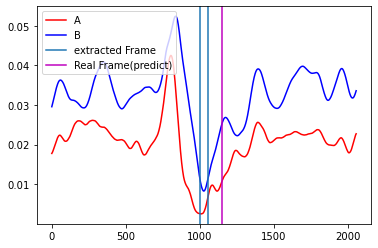

Matching Rate : 41.05%
70번째


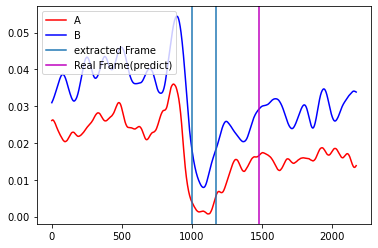

Matching Rate : 83.72%
71번째


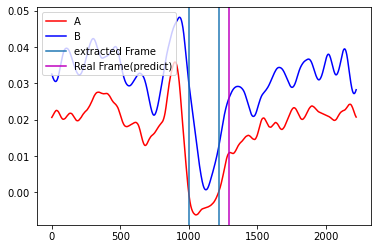

Matching Rate : 95.71%
72번째


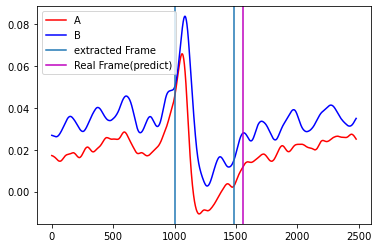

Matching Rate : 62.37%
73번째


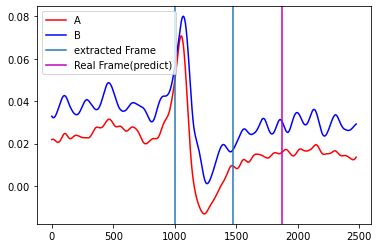

Matching Rate : 89.0%
74번째


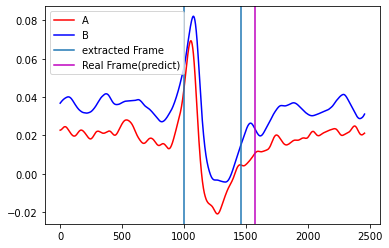

Matching Rate : 98.39%
75번째


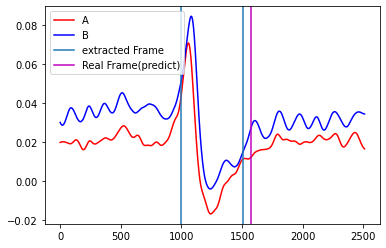

Matching Rate : 99.86%
76번째


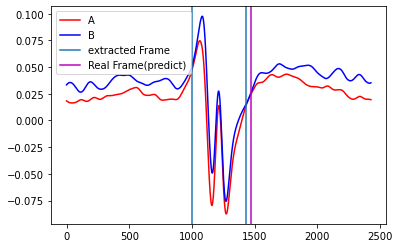

Matching Rate : 79.5%
77번째


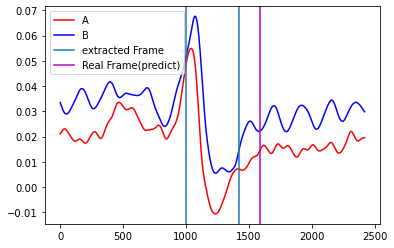

Matching Rate : 97.82%
78번째


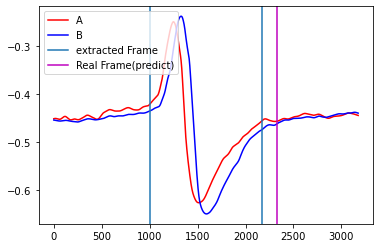

Matching Rate : 67.11%
79번째


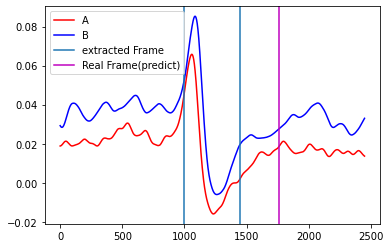

Matching Rate : 93.86%
80번째


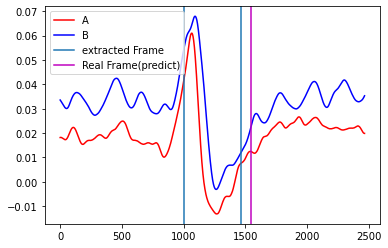

Matching Rate : 74.45%
81번째


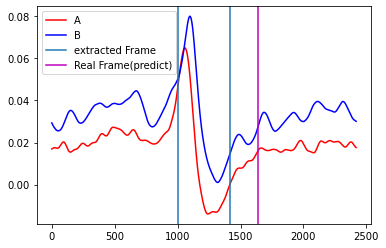

Matching Rate : 92.96%
82번째


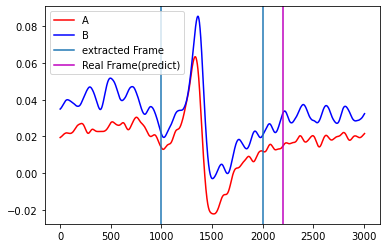

Matching Rate : 94.31%
83번째


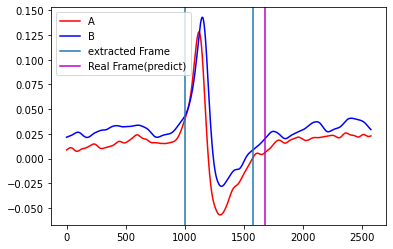

Matching Rate : 98.34%
84번째


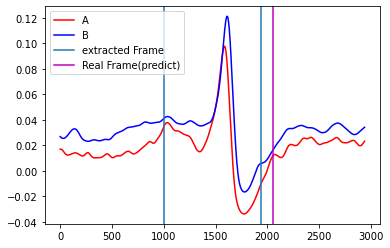

Matching Rate : 79.66%
85번째


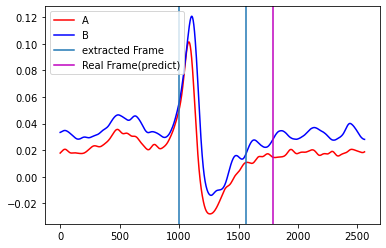

Matching Rate : 81.85%
86번째


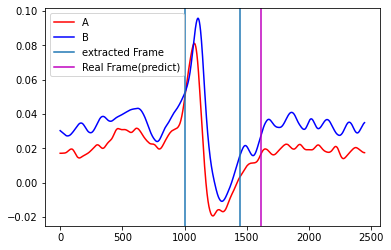

Matching Rate : 82.39%
87번째


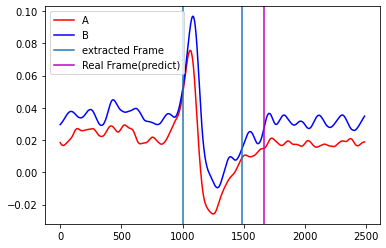

Matching Rate : 65.85%
88번째


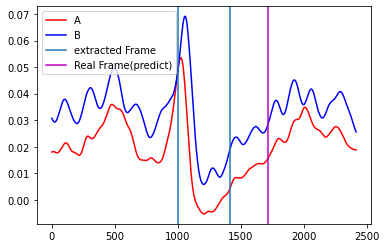

Matching Rate : 97.44%
89번째


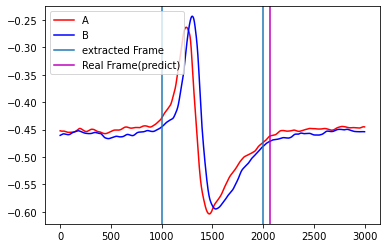

Matching Rate : 71.87%
90번째


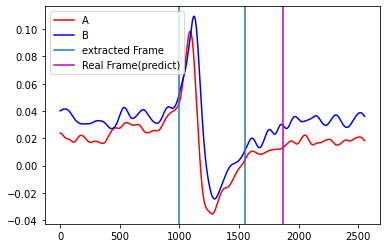

Matching Rate : 81.37%
91번째


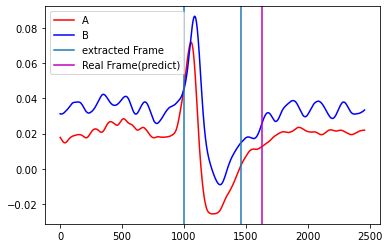

Matching Rate : 80.41%
92번째


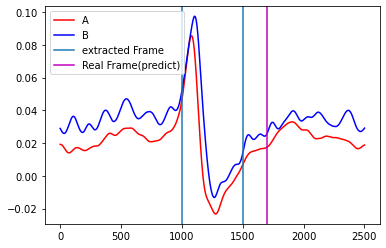

Matching Rate : 84.8%
93번째


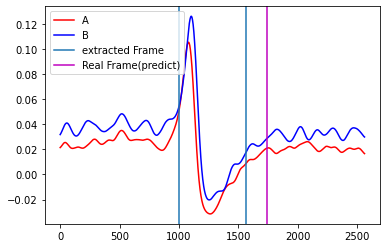

In [10]:
Day = datetime.today().strftime("%Y.%m.%d %H%M%S")
Initial_threshold = 0.022

motion_list,human_list = Init()

for motion in motion_list:
    for human in human_list:
        check = 0
        A_5sec,B_5sec = Data_load(date_path,motion,human)
        
        for file in range(0,len(A_5sec)):
            matching_rate = 0
            check_A = 0
            check_B = 0
            A = pd.read_csv(A_5sec[file]).values
            B = pd.read_csv(B_5sec[file]).values
            A_mean = np.mean(A[199:699])
            A_threshold_up = A_mean+(Initial_threshold/2)
            A_threshold_down = A_mean-(Initial_threshold/2)
            B_mean = np.mean(B[199:699])
            B_threshold_up = B_mean+(Initial_threshold/2)
            B_threshold_down = B_mean-(Initial_threshold/2)

            for i in range(1000):
                if (A_threshold_down <= A[(len(A)-1000)+i] <= A_threshold_up):
                    check_A = i
                    break
            for i in range(1000):
                if (B_threshold_down <= B[(len(B)-1000)+i] <= B_threshold_up):
                    check_B = i
                    break
            check = max([check_A,check_B])
            extract_frame_length = (len(A)-2000)*1.2
            original_frame_length = ((len(A)-2000)*1.1) + check
            if original_frame_length >= extract_frame_length:
                matching_rate = (extract_frame_length/original_frame_length)*100
            else :
                matching_rate = (1-((extract_frame_length-original_frame_length)/original_frame_length))*100
            print('Matching Rate : ' + str(round(matching_rate,2)) + '%')
            #print(round((extract_frame_length/original_frame_length)*100,2))
            #print(round((1-((extract_frame_length-original_frame_length)/original_frame_length))*100,2)).
            print(str(file) + '번째')
            plt.plot(A, label = 'A', c = 'r')
            plt.plot(B, label = 'B', c = 'b')
            plt.axvline(x=1000, label = 'extracted Frame')
            plt.axvline(x=len(A) - 1000)
            plt.axvline(x=len(A)-1000+check, c = 'm', label = 'Real Frame(predict)')
            plt.legend(loc = 'upper left')
            plt.show()